# Tarea 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors


### Ejemplo 1

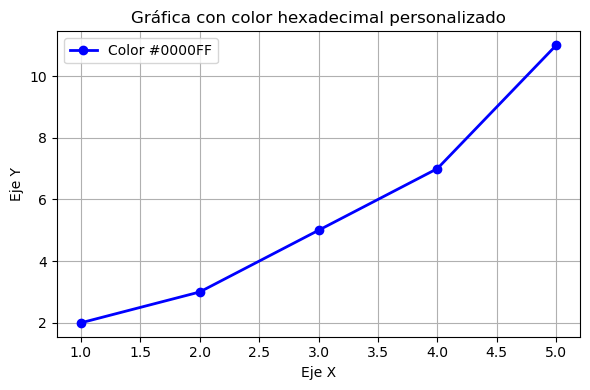

In [3]:
# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Color personalizado en hexadecimal
hex_color = "#0000FF"  # Azul

# Crear gráfica
plt.figure(figsize=(6, 4))
plt.plot(x, y, marker='o', color=hex_color, linewidth=2, label=f"Color {hex_color}")
plt.title("Gráfica con color hexadecimal personalizado")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True)
plt.tight_layout()


#### Ejemplo 2

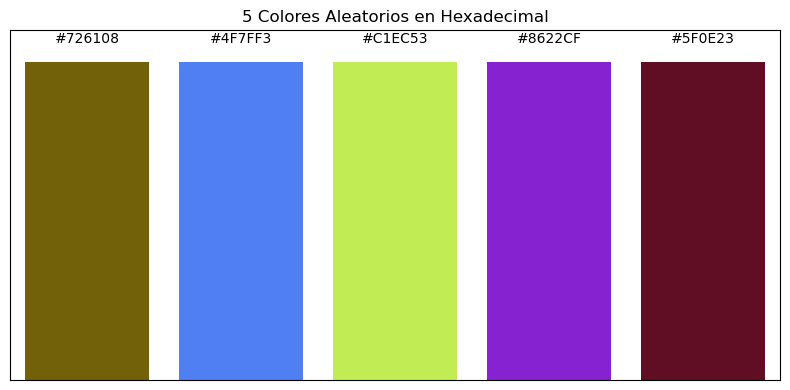

In [4]:
def generate_random_hex_color():
    return "#{:06X}".format(random.randint(0, 0xFFFFFF))

# Generar 5 colores aleatorios
colors = [generate_random_hex_color() for _ in range(5)]

# Graficar como barras de colores
plt.figure(figsize=(8, 4))
for i, color in enumerate(colors):
    plt.bar(i, 1, color=color)
    plt.text(i, 1.05, color, ha='center', va='bottom', fontsize=10)
    
plt.xticks([])
plt.yticks([])
plt.title("5 Colores Aleatorios en Hexadecimal")
plt.xlim(-0.5, 4.5)
plt.ylim(0, 1.1)
plt.tight_layout()

Ejemplo de uso de codificacion hexadecimal del color , se quiere representar la distribución de temperatura en una placa usando colores, internamente, matplotlib traduce cada valor numérico a un código RGB/hex para generar la imagen.

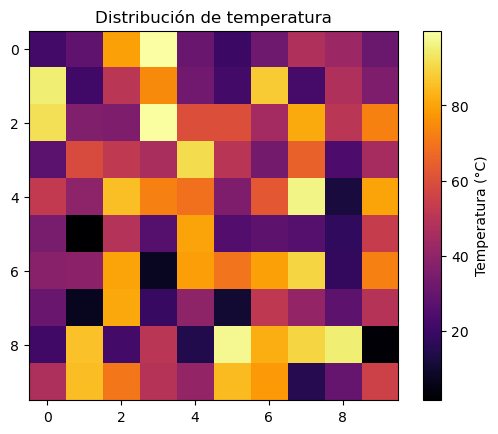

In [5]:

temperatura = np.random.rand(10, 10) * 100  # Temperaturas entre 0 y 100 °C
plt.imshow(temperatura, cmap='inferno')     # Mapa de color inferno (RGB)
plt.colorbar(label="Temperatura (°C)")
plt.title("Distribución de temperatura")
plt.show()

## Tarea 1
Generar un mapa de color personalizado a partir de un color hexadecimal base

### Instrucciones:
1. Define un color base en formato hexadecimal, por ejemplo `#66ccff` (azul claro).
2. Genera con numpy una matriz de valores aleatorios entre 0 y 1 (por ejemplo de 10x10).
3. Completa la función `darken_color` , que cumpla las siguientes caracteristicas:
   - Reciba un valor entre 0 y 1.
   - Devuelva un color más oscuro que el color base, en función del valor recibido.
     * A mayor valor, más oscuro el color.
5. Aplica tu función a cada valor para obtener una matriz de colores personalizados.
6. Muestra la matriz de colores como una imagen (`imshow` de matplotlib), sin usar colormaps predefinidos.
7. Bonus: agrega una barra de color personalizada o una leyenda.

### Requisitos:
- Trabajar con el formato de color hexadecimal.
- No usar cmap de Matplotlib (se construye a mano).
- Usar `matplotlib.colors.to_rgb` y `matplotlib.colors.to_hex` puede ayudarte.


In [7]:
# Paso 1: color base
# Define el color base en hexadecimal
base_hex = "#66ccff"  # Azul claro

# Convierte el color base a formato RGB normalizado (valores entre 0 y 1)
base_rgb = np.array(mcolors.to_rgb(base_hex))


Que hace la función `to_rgb`?

### ¿Qué hace la función `to_rgb`?

La función `to_rgb` de la librería `matplotlib.colors` convierte un color dado (en formato hexadecimal, nombre, o tupla RGB entera) a una tupla RGB **normalizada**, es decir, con valores entre 0 y 1.

Por ejemplo:

```python
from matplotlib.colors import to_rgb

to_rgb("#66ccff")
# Resultado: (0.4, 0.8, 1.0)


In [8]:
# Paso 2: generar datos, generamos una matriz de datos aleatorios
data = np.random.rand(10, 10)  # matriz de 10x10 con valores entre 0 y 1

In [9]:
print(data)

[[2.14740204e-01 3.66469282e-01 9.59977600e-01 6.66955046e-01
  3.53434249e-01 3.11343049e-01 1.18029284e-01 5.08068834e-01
  8.05393356e-01 3.32933036e-01]
 [5.25492804e-01 3.27639154e-01 4.05706905e-01 4.66042392e-01
  6.53203241e-01 7.62386695e-04 4.59740492e-01 2.97643628e-01
  4.56314570e-01 2.31040608e-02]
 [2.91202738e-01 9.49932536e-01 5.44737340e-01 8.22769219e-01
  4.26230255e-01 8.39278693e-01 2.17159617e-02 9.47737963e-01
  2.75521189e-01 6.27603744e-01]
 [6.85627080e-01 8.21496399e-01 6.33343717e-01 1.07790050e-01
  6.64605720e-01 6.43997579e-01 9.96090922e-02 7.81501975e-01
  8.51259030e-01 1.66686794e-02]
 [9.76297982e-03 4.01759597e-01 7.22244470e-01 7.57006911e-01
  1.74176069e-01 2.53837096e-01 1.81401512e-01 2.62000249e-02
  9.79381215e-02 5.49393829e-01]
 [9.89106049e-01 9.25458657e-01 2.83327632e-01 8.91455845e-02
  2.83618391e-01 7.69967212e-01 3.71841265e-01 5.54968758e-01
  1.36492751e-01 3.58589781e-01]
 [7.80680202e-01 5.91009929e-01 8.47179499e-01 5.97294703e

In [61]:
def darken_color(value, base_color):
    """
    value: float entre 0 (sin cambio) y 1 (oscuro)
    base_color: array RGB (valores entre 0 y 1)
    """
    # Oscurecer el color base proporcionalmente al valor
    # Si value = 0 → color original (sin cambio)
    # Si value = 1 → negro (0, 0, 0)
    darkened = base_color * (1 - value)  # reduce intensidad
    
    return mcolors.to_hex(darkened)


In [62]:
color_matrix = np.vectorize(lambda v: darken_color(v, base_rgb))(data)
color_matrix

array([['#537fcf', '#38568d', '#25385c', '#4e77c2', '#2d4470', '#000000',
        '#38568d', '#192740', '#213252', '#314a7a'],
       ['#030406', '#1f304f', '#0d1421', '#537fd0', '#293f67', '#5e90ec',
        '#223556', '#5f91ec', '#5380d1', '#4c75bf'],
       ['#233658', '#090e17', '#4f79c6', '#6194f3', '#6397f7', '#6195f3',
        '#476cb1', '#5e90ec', '#06090e', '#283d64'],
       ['#293f68', '#0a101a', '#3b5a94', '#0d1420', '#1f2f4d', '#090e17',
        '#283d63', '#5784d8', '#121b2d', '#25395d'],
       ['#6194f2', '#080c13', '#283e65', '#5683d7', '#273c62', '#304977',
        '#000000', '#3d5e99', '#5480d1', '#324d7d'],
       ['#334e7f', '#476db2', '#3b5a93', '#0d1420', '#5887dd', '#2f4876',
        '#020305', '#1f304e', '#213353', '#5b8ce5'],
       ['#5c8ce5', '#05070c', '#5d8ee9', '#669bfe', '#4265a5', '#111929',
        '#090e17', '#273c63', '#080d15', '#1c2b46'],
       ['#293e66', '#5786da', '#0c121e', '#4569ac', '#476db2', '#496fb6',
        '#0a0f19', '#5785da', '#3a599

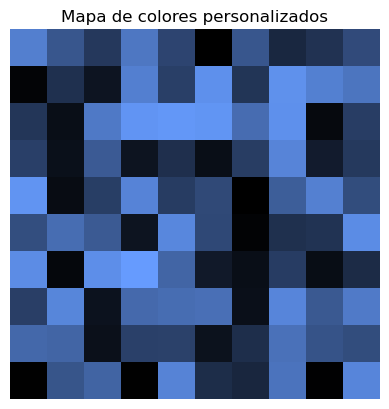

In [63]:
# Paso 4: generar imagen de colores
color_matrix = np.vectorize(lambda v: darken_color(v, base_rgb))(data)

# Paso 5: convertir a imagen RGB
rgb_matrix = np.array([[mcolors.to_rgb(color) for color in row] for row in color_matrix])

# Paso 6: mostrar
plt.imshow(rgb_matrix)
plt.title("Mapa de colores personalizados")
plt.axis('off')
plt.show()